# Import Libraries



In [1]:
# Importing libraries
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Extracting the contents of a zip file
import zipfile
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/archive')


In [4]:
# Setting image dimensions
im_width = 224
im_height = 224
# Defining paths to the train and test data directories
path = "/content/archive/vechicle_with_train/vechicles/train"
path_v = "/content/archive/vechicle_with_train/vechicles/test"

# Image Preprocessing

# Creating an ImageDataGenerator for train set with data augmentation

In [5]:
# Rescaling the image pixels for train set.
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # No change in image orientation.
    horizontal_flip=False)

# Creating an ImageDataGenerator for test set

In [6]:
# Rescaling the image pixels for test set.
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Creating generators for train and validation data

In [8]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(im_width, im_width),
    # Each batch of 64 images will contain a mixture of both classes
    class_mode='categorical',
    color_mode="rgb",
    batch_size=32,
    shuffle=True
)


Found 528 images belonging to 10 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    path_v,
    target_size=(im_width, im_width),
    class_mode='categorical',
    color_mode="rgb",
    batch_size=32,
    shuffle = False
)

Found 74 images belonging to 10 classes.


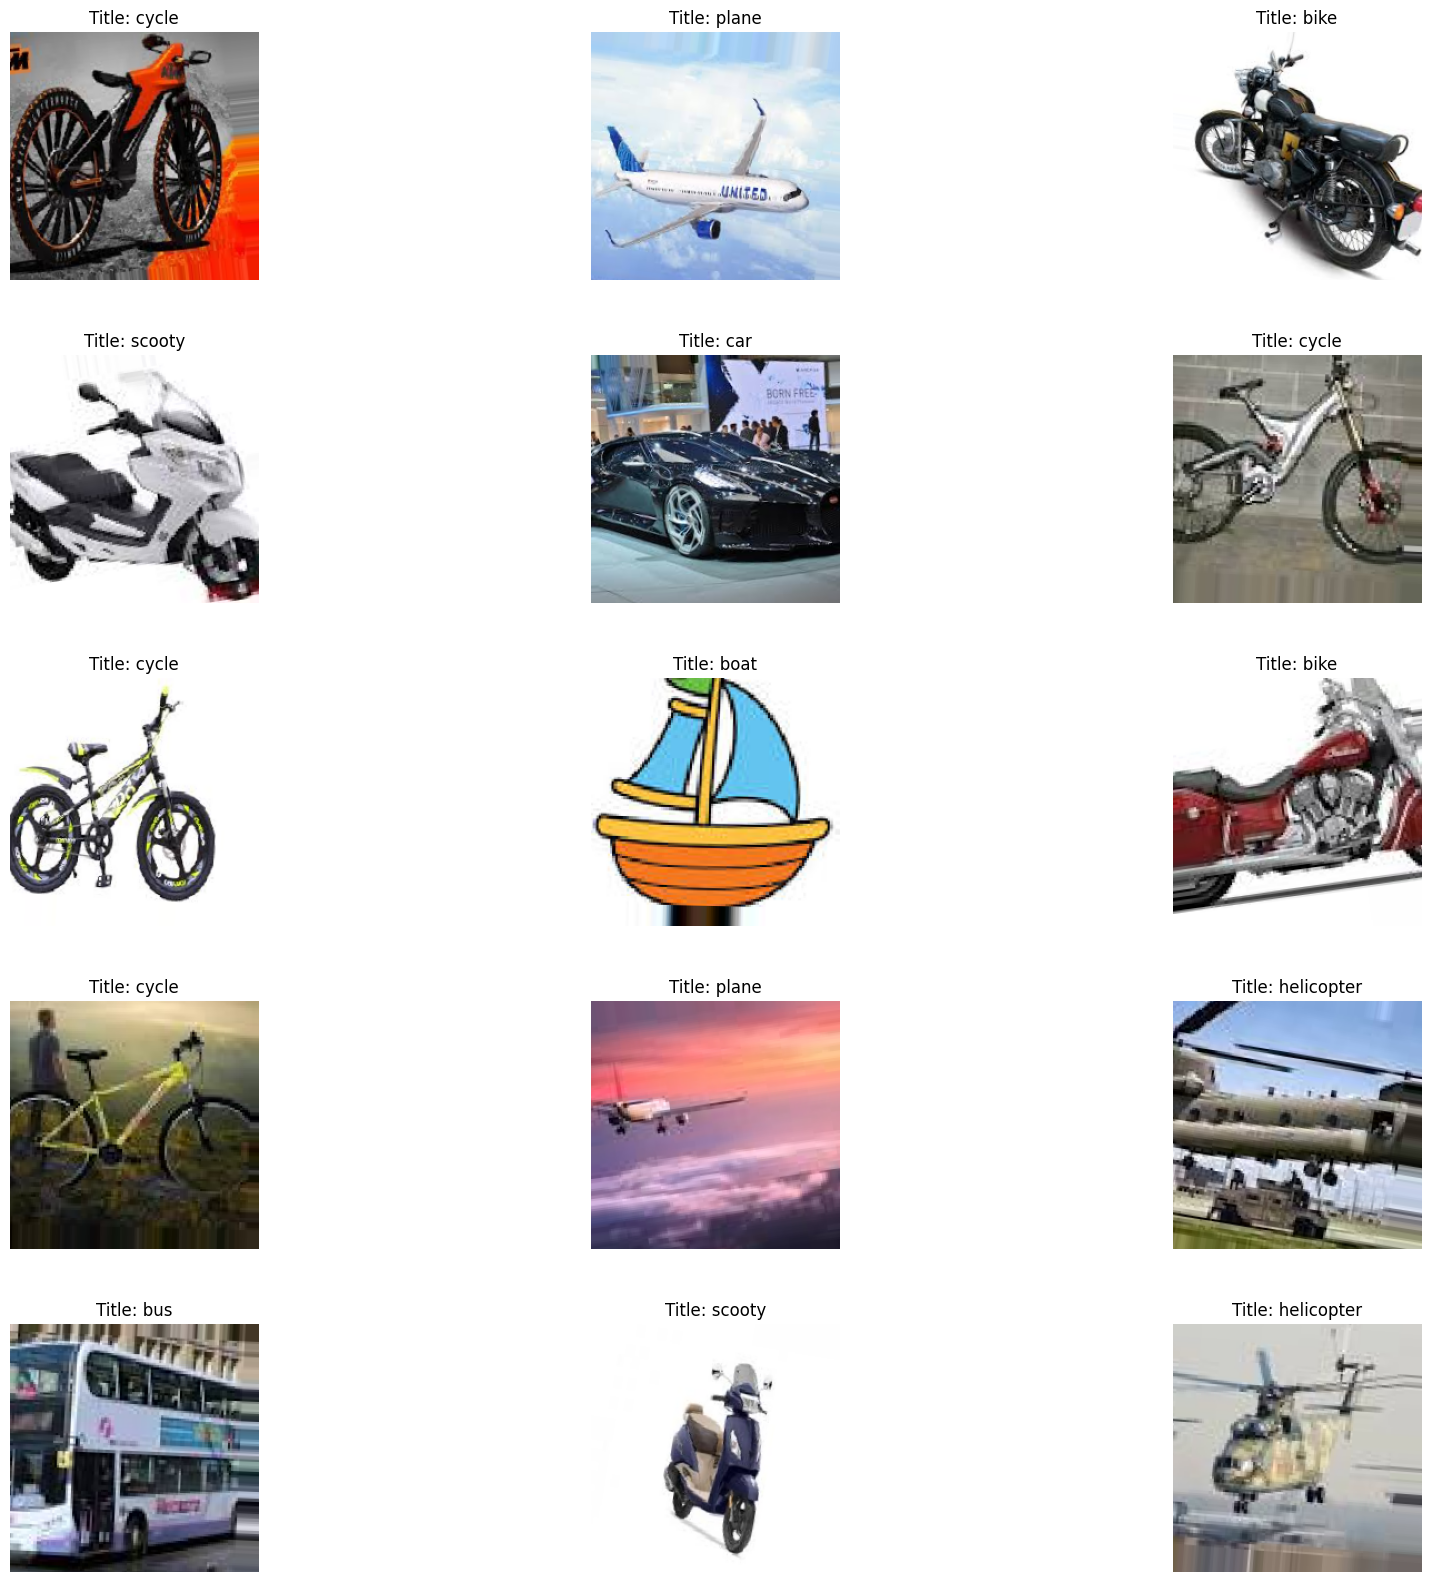

In [12]:
# Retrieving class labels
labels = [k for k in train_generator.class_indices]

# Returns a nested list containing the list of images(Numpy array) and a list of labels for visualization.
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20,20))

# Plotting sample images with labels
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.5)
    plt.imshow(images[i])
    plt.title(f"Title: {labels[np.argmax(titles[i], axis=0)]}")
    plt.axis('off')

# Plotting images from the generator for visualization

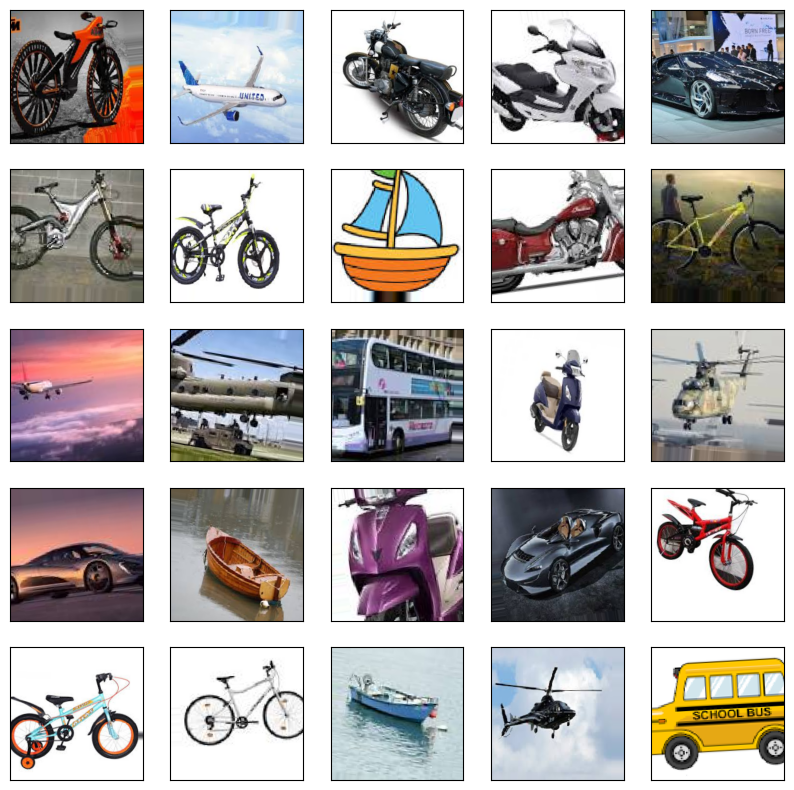

In [13]:
class_names = ['bike', 'boat', 'bus', 'car', 'cycle', 'helicopter', 'plane', 'scooty', 'train', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
plt.show()

# Build the CNN model

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Displaying model summary

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 346112)           

# Compiling the model

In [19]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])


# Train the model

In [18]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
17/17 [==============================] - 106s 6s/step - loss: 4.8526 - accuracy: 0.1174 - val_loss: 2.2659 - val_accuracy: 0.1351
Epoch 2/10
17/17 [==============================] - 103s 6s/step - loss: 2.2324 - accuracy: 0.1534 - val_loss: 2.2293 - val_accuracy: 0.1486
Epoch 3/10
17/17 [==============================] - 103s 6s/step - loss: 2.0825 - accuracy: 0.2254 - val_loss: 2.0913 - val_accuracy: 0.2703
Epoch 4/10
17/17 [==============================] - 103s 6s/step - loss: 1.9862 - accuracy: 0.2879 - val_loss: 2.0796 - val_accuracy: 0.2568
Epoch 5/10
17/17 [==============================] - 103s 6s/step - loss: 1.7983 - accuracy: 0.3939 - val_loss: 1.6247 - val_accuracy: 0.4459
Epoch 6/10
17/17 [==============================] - 104s 6s/step - loss: 1.6172 - accuracy: 0.4375 - val_loss: 1.8618 - val_accuracy: 0.4595
Epoch 7/10
17/17 [==============================] - 104s 6s/step - loss: 1.4555 - accuracy: 0.4867 - val_loss: 1.7817 - val_accuracy: 0.4459
Epoch 8/10
17

# Loading the model's training history and plotting loss

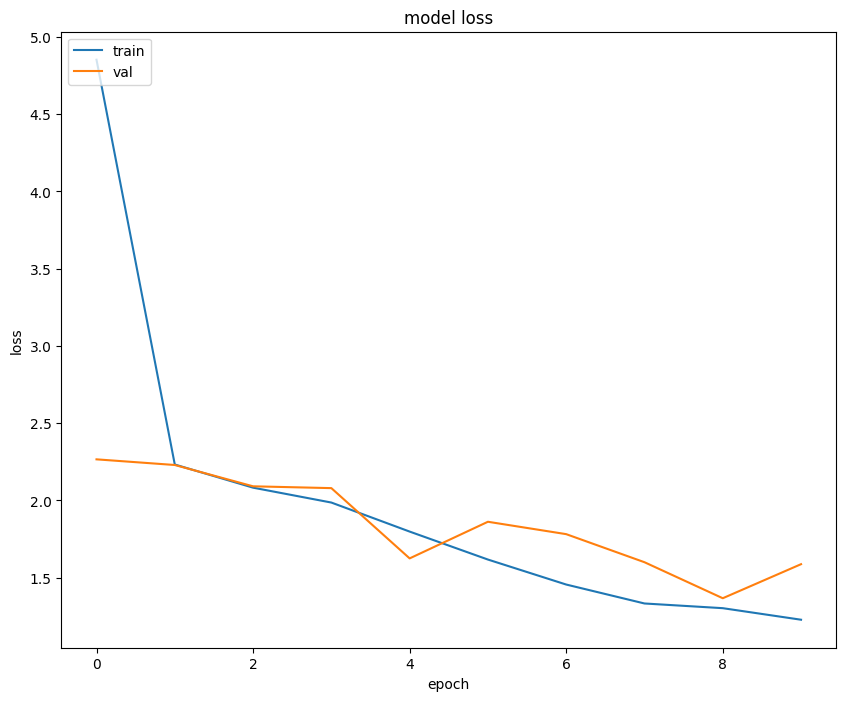

In [20]:
# Graph showing the history of training and validation loss with respect to No of epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loading the model's training history and plotting accuracy

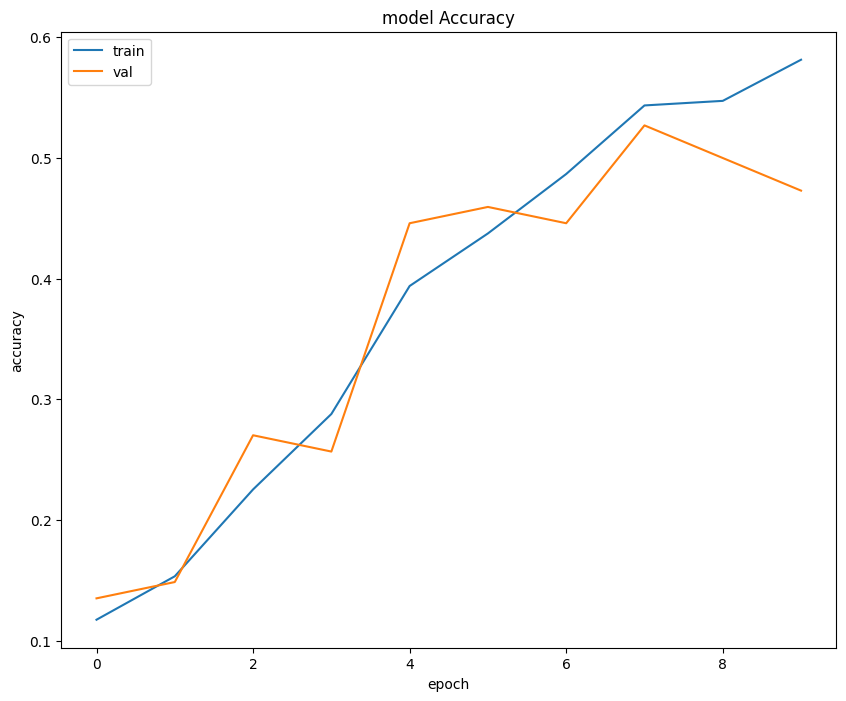

In [21]:
# Graph showing the history of training and val`idation loss with respect to No of epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Saving the model and Loading the saved model

In [22]:
model.save('vehicle.h5')
best_model=tf.keras.models.load_model('vehicle.h5')

In [23]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 346112)           

# Getting true labels and predicting on validation data

In [24]:
y_test = validation_generator.classes
y_pred_val = best_model.predict(validation_generator)
y_pred_val = np.argmax(y_pred_val,axis=1)

3/3 [==============================] - 3s 809ms/step


# Evaluating the model and printing classification report

In [25]:
# Evaluating the model.
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred_val,target_names = labels))

              precision    recall  f1-score   support

        bike       0.43      0.86      0.57         7
        boat       0.50      0.36      0.42        11
         bus       0.83      0.50      0.62        10
         car       0.29      0.57      0.38         7
       cycle       0.57      0.67      0.62         6
  helicopter       0.71      0.45      0.56        11
       plane       0.00      0.00      0.00         7
      scooty       0.33      0.67      0.44         3
       train       0.67      1.00      0.80         2
       truck       0.38      0.30      0.33        10

    accuracy                           0.47        74
   macro avg       0.47      0.54      0.47        74
weighted avg       0.49      0.47      0.45        74



# Load a few sample images

In [31]:
sample_image_paths = ['/content/archive/vechicles/test/scooty/Z (7).jpg', '/content/archive/vechicle_with_train/vechicles/train/helicopter/2Q__ (3).jpg', '/content/archive/vechicle_with_train/vechicles/train/car/2Q__ (1).jpg']
sample_images = [tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) for img_path in sample_image_paths]


# Preprocess the sample images

In [32]:
sample_images_preprocessed = [tf.keras.preprocessing.image.img_to_array(img) / 255.0 for img in sample_images]
sample_images_array = np.array(sample_images_preprocessed)

# Make predictions on the sample images

In [33]:
predictions = best_model.predict(sample_images_array)

1/1 [==============================] - 0s 239ms/step


# Display the sample images and their predictions

In [34]:
class_names = ['bike', 'boat', 'bus', 'car', 'cycle', 'helicopter', 'plane', 'scooty', 'train', 'truck']


In [35]:
plt.figure(figsize=(15, 15))
for i in range(len(sample_images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
    plt.axis('off')

plt.show()